# 시계열 데이터 확인

## #01. 작업준비

### 1) 패키지 가져오기

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

from hossam.util import *
from hossam.plot import *

# 데이터 정상성 확인을 위한 ADF 검정
from statsmodels.tsa.stattools import adfuller

### 2) 데이터 가져오기

월간 항공 승객 수

> https://www.kaggle.com/datasets/rakannimer/air-passengers

시계열 분석시 주의사항은 인덱스가 시간 혹은 날짜로 설정되어 있는지와 결측치 및 이상치의 확인이다. 

In [2]:
origin = my_read_excel("https://data.hossam.kr/tsdata/air_passengers.xlsx", index_col="Month")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None

데이터프레임 상위 5개 행
+---------------------+--------------+
| Month               |   Passengers |
|---------------------+--------------|
| 1949-01-01 00:00:00 |          112 |
| 1949-02-01 00:00:00 |          118 |
| 1949-03-01 00:00:00 |          132 |
| 1949-04-01 00:00:00 |          129 |
| 1949-05-01 00:00:00 |          121 |
+---------------------+--------------+

데이터프레임 하위 5개 행
+---------------------+--------------+
| Month               |   Passengers |
|---------------------+--------------|
| 1960-08-01 00:00:00 |          606 |
| 1960-09-01 00:00:00 |          508 |
| 1960-10-01 00:00:00 |          461 |
| 1960-11-01 00:00:00 |          390 |
| 1960-12-01 00:00:00 |          432 |
+---------------------

> 데이터에 결측치가 없는 것이 확인된다.

## #02. 데이터 확인

### [1] 상자그림 확인

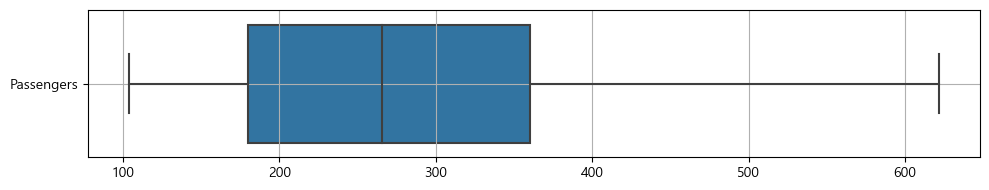

In [3]:
my_boxplot(origin, figsize=(10, 2), orient='h')

> 이상치가 없음이 확인된다.

### [2] 기본 형태의 시계열 그래프를 통한 정상성 확인

시계열 데이터를 본격적으로 다루기 전에 결측치와 이상치가 없음을 먼저 확인해야 한다.

데이터의 패턴은 보이지만 비정상성임을 알 수 있다.

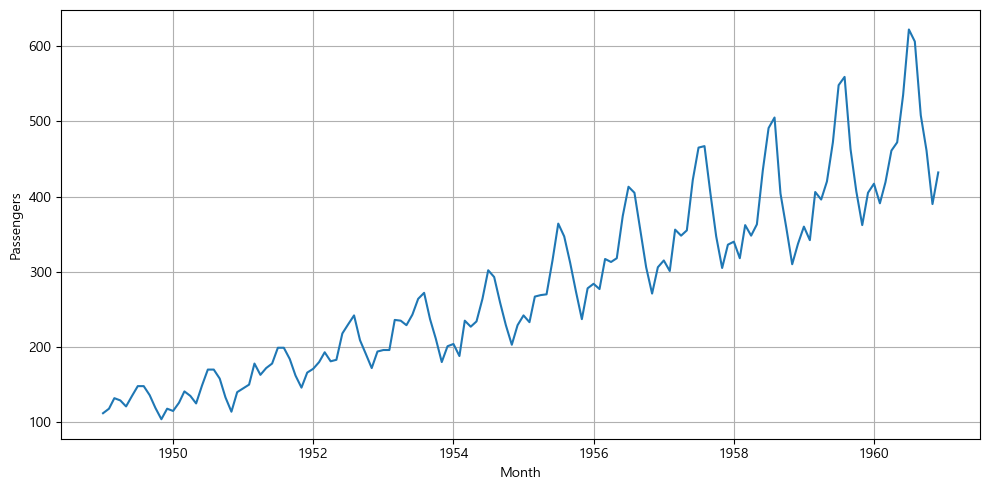

In [4]:
my_lineplot(df=origin, xname=origin.index, yname='Passengers')

> 비정상 시계열임이 확인된다.

### [3] ADF 테스트

시계열 데이터의 정상성 여부를 판단하기 위한 검정

| 가설 | 내용 |
|---|---|
| 귀무가설 | 데이터가 정상성과 다르다 (=비정상성임을 의미) |
| 대립가설 | 데이터가 정상성이다. |

In [5]:
ar = adfuller(origin['Passengers'])

print('검정통계량(ADF Statistic): %f' % ar[0])
print('유의수준(p-value): %f' % ar[1])
print('최적차수(num of lags): %f' % ar[2])
print('관측치 개수(num of observations): %f' % ar[3])
print('기각값(Critical Values):')
for key, value in ar[4].items():
    print('\t%s: %.3f' % (key, value))

print('데이터 정상성 여부: ', '정상' if ar[1] <= 0.05 else '비정상')

검정통계량(ADF Statistic): 0.815369
유의수준(p-value): 0.991880
최적차수(num of lags): 13.000000
관측치 개수(num of observations): 130.000000
기각값(Critical Values):
	1%: -3.482
	5%: -2.884
	10%: -2.579
데이터 정상성 여부:  비정상


## #04. 차분

### [1] 1차 차분

In [6]:
df = origin.diff().dropna()
# my_lineplot(df=df, xname=df.index, yname='Passengers')

ar = adfuller(df['Passengers'])

print('검정통계량(ADF Statistic): %f' % ar[0])
print('유의수준(p-value): %f' % ar[1])
print('최적차수(num of lags): %f' % ar[2])
print('관측치 개수(num of observations): %f' % ar[3])
print('기각값(Critical Values):')
for key, value in ar[4].items():
    print('\t%s: %.3f' % (key, value))

print('데이터 정상성 여부: ', '정상' if ar[1] < 0.05 else '비정상')

검정통계량(ADF Statistic): -2.829267
유의수준(p-value): 0.054213
최적차수(num of lags): 12.000000
관측치 개수(num of observations): 130.000000
기각값(Critical Values):
	1%: -3.482
	5%: -2.884
	10%: -2.579
데이터 정상성 여부:  비정상


### [2] 2차 차분

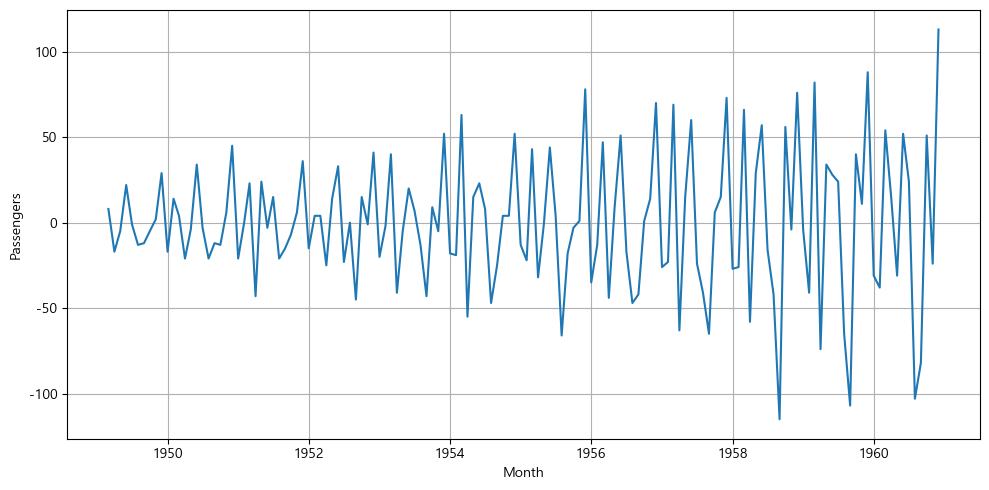

검정통계량(ADF Statistic): -16.384232
유의수준(p-value): 0.000000
최적차수(num of lags): 11.000000
관측치 개수(num of observations): 130.000000
기각값(Critical Values):
	1%: -3.482
	5%: -2.884
	10%: -2.579
데이터 정상성 여부:  정상


In [7]:
df2 = df.diff().dropna()
my_lineplot(df=df2, xname=df2.index, yname='Passengers')

ar = adfuller(df2['Passengers'])

print('검정통계량(ADF Statistic): %f' % ar[0])
print('유의수준(p-value): %f' % ar[1])
print('최적차수(num of lags): %f' % ar[2])
print('관측치 개수(num of observations): %f' % ar[3])
print('기각값(Critical Values):')
for key, value in ar[4].items():
    print('\t%s: %.3f' % (key, value))

print('데이터 정상성 여부: ', '정상' if ar[1] < 0.05 else '비정상')

### [2] 2차 차분

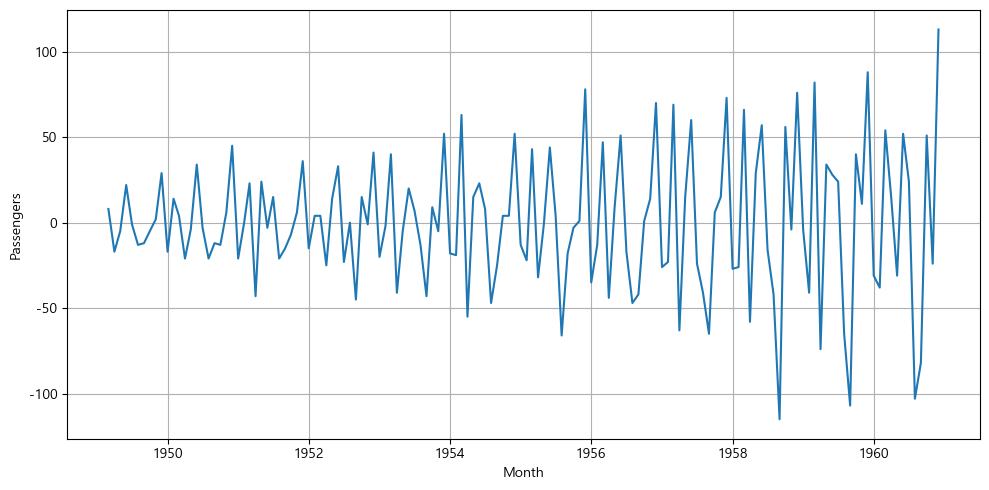

검정통계량(ADF Statistic): -16.384232
유의수준(p-value): 0.000000
최적차수(num of lags): 11.000000
관측치 개수(num of observations): 130.000000
기각값(Critical Values):
	1%: -3.482
	5%: -2.884
	10%: -2.579
데이터 정상성 여부:  정상


In [8]:
df2 = df.diff().dropna()
my_lineplot(df=df2, xname=df2.index, yname='Passengers')

ar = adfuller(df2['Passengers'])

print('검정통계량(ADF Statistic): %f' % ar[0])
print('유의수준(p-value): %f' % ar[1])
print('최적차수(num of lags): %f' % ar[2])
print('관측치 개수(num of observations): %f' % ar[3])
print('기각값(Critical Values):')
for key, value in ar[4].items():
    print('\t%s: %.3f' % (key, value))

print('데이터 정상성 여부: ', '정상' if ar[1] < 0.05 else '비정상')